In [106]:
%pylab inline

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.utils import np_utils 

Populating the interactive namespace from numpy and matplotlib


In [3]:
mnist = fetch_openml('mnist_784',version=1)

In [74]:
X, y = mnist['data'], mnist['target'].astype(int)
X = X/255

X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
y_train_cat, y_test_cat = np_utils.to_categorical(y_train,10), np_utils.to_categorical(y_test,10)

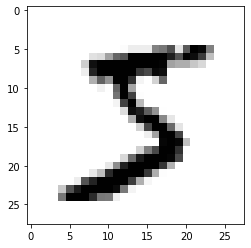

In [38]:
imshow(X[0].reshape(28,28),cmap='binary')

In [174]:
X_bin = 1.0*(X>0.5)

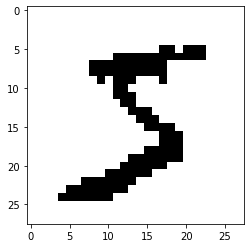

In [175]:
imshow(X_bin[0].reshape(28,28),cmap='binary')

In [189]:
pca = PCA(n_components=0.9)

In [190]:
X_train_reduced = pca.fit_transform(1.0*(X_train>0.5))

In [191]:
pca.explained_variance_ratio_.sum()

0.9002519607482482

In [180]:
clf1 = LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=100)

In [211]:
clf1.fit(X_train_reduced, y_train)

/Users/isaacdrachman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
clf1.score(pca.transform(1.0*(X_test>0.5)),y_test)

0.9152

In [213]:
model = Sequential() 
model.add(Dense(10, input_dim=X_train_reduced.shape[1], activation='softmax')) 
#model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train_reduced, y_train_cat, batch_size=128, epochs=20, verbose=1) 

Epoch 1/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.3359 - accuracy: 0.5919
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.7468 - accuracy: 0.7969
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.6122 - accuracy: 0.8336
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5479 - accuracy: 0.8490
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5090 - accuracy: 0.8580
Epoch 6/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.4822 - accuracy: 0.8655
Epoch 7/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.4624 - accuracy: 0.8705
Epoch 8/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.4471 - accuracy: 0.8745
Epoch 9/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.4347 - accuracy: 0.8777
Epoch 10/20
60000/60000 [==============================] - 1s 8

In [214]:
model.evaluate(pca.transform(1.0*(X_test>0.5)), y_test_cat, verbose=0)

[0.35472339992523194, 0.9007999897003174]